Based on http://edwardlib.org/getting-started

In [14]:
import numpy as np
import tensorflow as tf
import edward as ed
import pandas as pd
import matplotlib
%matplotlib inline

Simulate a toy dataset of 50 observations with a cosine relationship

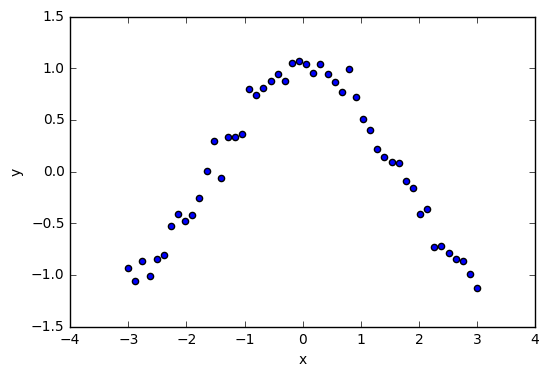

In [22]:
x_train = np.linspace(-3, 3, num=50)
y_train = np.cos(x_train) + np.random.normal(0, 0.1, size=50)
pd.DataFrame({"x" : x_train, "y" : y_train}).plot(x="x", y="y", kind="scatter");

Reshape vectors to become matrices with 1 column

In [23]:
x_train = x_train.astype(np.float32).reshape((50, 1))
y_train = y_train.astype(np.float32).reshape((50, 1))

Define a two-layer Bayesian neural network. Here, we define the neural network manually with tanh nonlinearities

In [32]:
np.matmul(np.zeros([1, 2]), np.zeros([2, 1]))

array([[ 0.]])

In [3]:
W_0 = ed.models.Normal(mu=tf.zeros([1, 2]), sigma=tf.ones([1, 2]))
b_0 = ed.models.Normal(mu=tf.zeros(2), sigma=tf.ones(2))

W_1 = ed.models.Normal(mu=tf.zeros([2, 1]), sigma=tf.ones([2, 1]))
b_1 = ed.models.Normal(mu=tf.zeros(1), sigma=tf.ones(1))

x = x_train
y = ed.models.Normal(mu=tf.matmul(tf.tanh(tf.matmul(x, W_0) + b_0), W_1) + b_1, sigma=0.1)

Make inferences about the model from data. We will use variational inference. Specify a normal approximation over the weights and biases.

In [4]:
qW_0 = ed.models.Normal(mu=tf.Variable(tf.zeros([1, 2])),
              sigma=tf.nn.softplus(tf.Variable(tf.zeros([1, 2]))))
qW_1 = ed.models.Normal(mu=tf.Variable(tf.zeros([2, 1])),
              sigma=tf.nn.softplus(tf.Variable(tf.zeros([2, 1]))))
qb_0 = ed.models.Normal(mu=tf.Variable(tf.zeros(2)),
              sigma=tf.nn.softplus(tf.Variable(tf.zeros(2))))
qb_1 = ed.models.Normal(mu=tf.Variable(tf.zeros(1)),
              sigma=tf.nn.softplus(tf.Variable(tf.zeros(1))))

Run variational inference with the Kullback-Leibler divergence in order to infer the model’s latent variables given data

In [25]:
inference = ed.KLqp({W_0: qW_0, b_0: qb_0,
                     W_1: qW_1, b_1: qb_1}, data={y: y_train})
inference.run(n_iter=500)

Iteration   1 [  0%]: Loss = 1258.123
Iteration  50 [ 10%]: Loss = 2254.828
Iteration 100 [ 20%]: Loss = 1198.416
Iteration 150 [ 30%]: Loss = 1246.887
Iteration 200 [ 40%]: Loss = 1288.188
Iteration 250 [ 50%]: Loss = 1225.782
Iteration 300 [ 60%]: Loss = 768.743
Iteration 350 [ 70%]: Loss = 111.406
Iteration 400 [ 80%]: Loss = 13.850
Iteration 450 [ 90%]: Loss = 10.089
Iteration 500 [100%]: Loss = 4.121


In [33]:
y_post = ed.models.Normal(mu=tf.matmul(tf.tanh(tf.matmul(x, qW_0.mean()) + qb_0.mean()), qW_1.mean()) + qb_1.mean(), sigma=0.1)

In [35]:
y_post.

AttributeError: 'Normal' object has no attribute 'plot'